In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotutils import get_quantile, get_grouped_desc, boxplot, process_results, plot_time_series

In [3]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep')

In [4]:
volume_title = 'Volume IDPs'
area_title = 'Area IDPs'
greywhite_title = 'Grey-White Contrast IDPs'
meanthick_title = 'Mean Thickness IDPs'
meaninten_title = 'Mean Intensity IDPs'

loss_title = 'Training MSE'

# Vanilla vs Pyramid

In [5]:
pyr_hist, pyr_desc = process_results('pyramid/sfcn_pyramid_qn')
vanilla_hist, vanilla_desc = process_results('vanilla/sfcn_vanilla')
glomax_hist, glomax_desc = process_results('GlobalPooling/glomax/sfcn_glomax')

histlist = [pyr_hist, vanilla_hist]
desclist = [pyr_desc, vanilla_desc]
lbls = ['Pyramid', 'Vanilla']

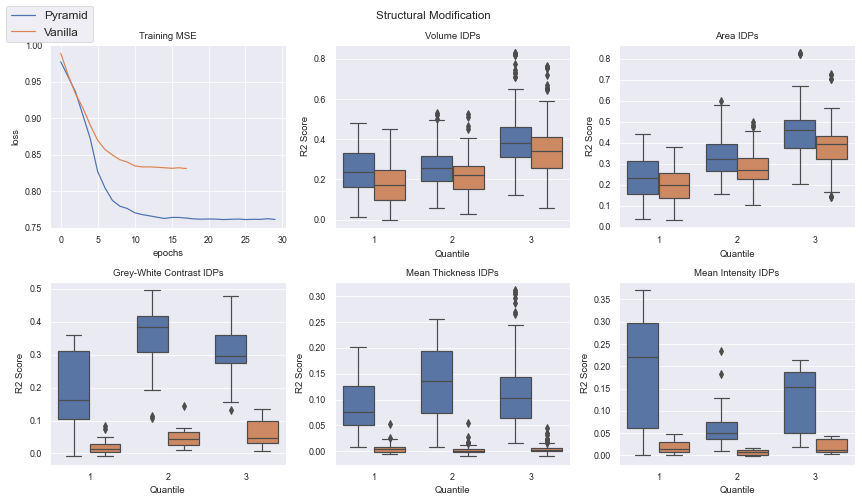

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))


plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Structural Modification')
fig.legend(lbls, loc='upper left', prop={'size':12})
plt.tight_layout()
fig.savefig('vanillapyr.png')
plt.show()

## Details

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Vanilla | 0.84 | 0.18     | 3.0 M | 18 |
| Pyramid | 0.76 | 0.26 | 1.7 M | 30 |

# Downsampling Methods (Strides and Average Pooling)

In [8]:
avgpool_hist, avgpool_desc = process_results('PoolingTypes/AvgPool/sfcn_pyramid_avg_qn', index=2)
strides2_hist, strides2_desc = process_results('PoolingTypes/Strides2/sfcn_pyramid_strides2_qn')
strides3_hist, strides3_desc = process_results('PoolingTypes/Strides3/sfcn_pyramid_strides3_qn')

histlist = [pyr_hist, avgpool_hist, strides2_hist, strides3_hist]
desclist = [pyr_desc, avgpool_desc, strides2_desc, strides3_desc]
lbls = ['Baseline' ,'avg pool', 'strides 2', 'strides 3']

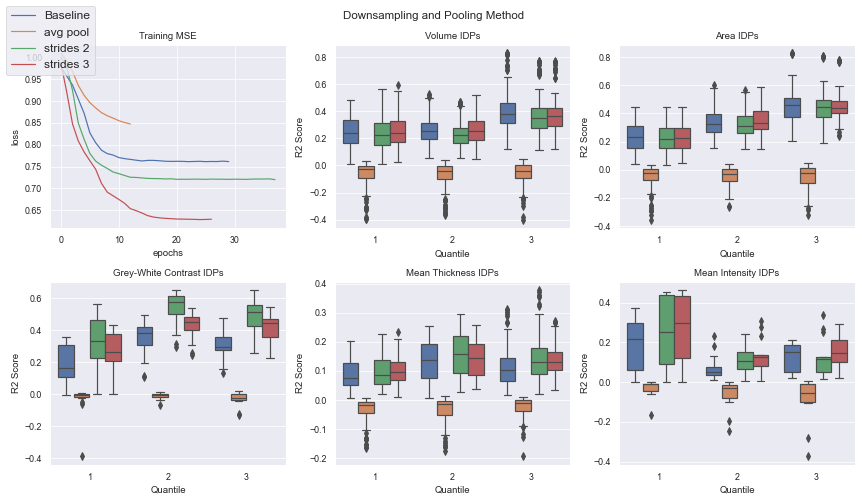

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Downsampling and Pooling Method')
fig.legend(lbls, loc='upper left', prop={'size':12})
plt.tight_layout()
fig.savefig('poolstrides.png')
plt.show()

## Details

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Baseline | 0.76 | 0.26 | 1.7 M | 30 |
| avg pooling |	1.08 | -0.05 |	1.7 M |	8 |										
| strides pooling (size: 2) | 0.76 | 0.27 | 1.7M | 38 |		
| strides pooling (size: 3) | 0.75 | 0.27 | 0.8 M |27 |																							

# Kernel Sizes

In [11]:
kernel2_hist, kernel2_desc = process_results('KernelSizes/size2/sfcn_pyramid_small_kern_qn', index=1)
kernel4_hist, kernel4_desc = process_results('KernelSizes/size4/sfcn_pyramid_big_kern_qn', index=1)

histlist = [pyr_hist, kernel2_hist, kernel4_hist]
desclist = [pyr_desc, kernel2_desc, kernel4_desc]
lbls = ['Baseline' ,'Size: 2', 'Size: 4']

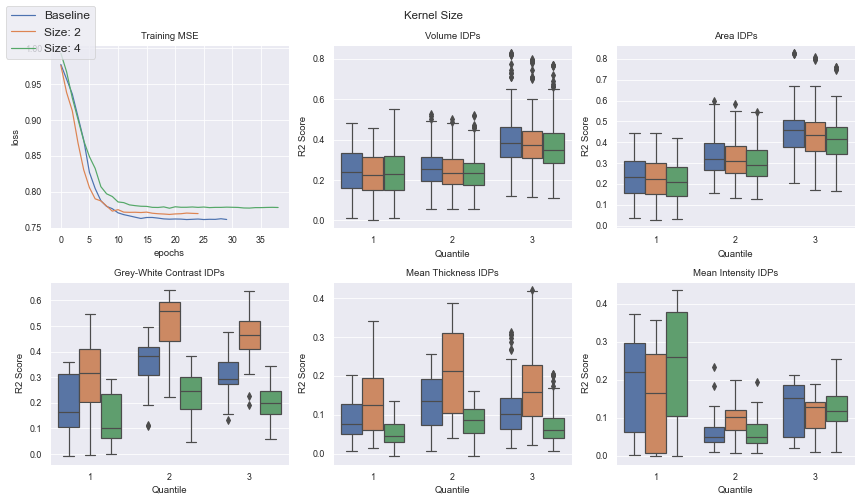

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Kernel Size')
fig.legend(lbls, loc='upper left', prop={'size':12})
plt.tight_layout()
fig.savefig('kernsizes.png')
plt.show()

## Details

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Baseline | 0.76 | 0.26 | 1.7 M | 30 |										
| kernel (size: 2) | 0.75 | 0.27 | 0.8 M | 25 |		
| kernel (size: 4) | 0.79 | 0.23 | 3.4 M | 39 |																							

# Global Pooling Size and Type

In [14]:
deeper_hist, deeper_desc = process_results('SizeBeforeGlobalPooling/deeper/sfcn_deeper')
downsampled_hist, downsampled_desc = process_results('SizeBeforeGlobalPooling/downsampled/sfcn_ds')
glomax_hist, glomax_desc = process_results('GlobalPooling/glomax/sfcn_glomax')

histlist = [pyr_hist, downsampled_hist, deeper_hist, glomax_hist]
desclist = [pyr_desc, downsampled_desc, deeper_desc, glomax_desc]
lbls = ['Baseline' ,'Downsampled', 'Deeper', 'Global Max']

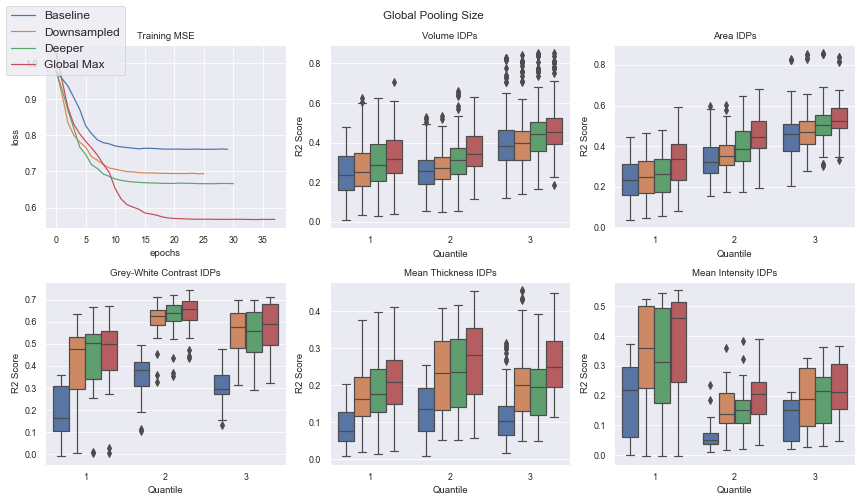

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Global Pooling Size')
fig.legend(lbls, loc='upper left', prop={'size':12})
plt.tight_layout()
fig.savefig('sizeatglopol.png')
plt.show()

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Baseline | 0.76 | 0.26 | 1.7 M | 30 |										
| Downsampled | 0.7 | 0.31 | 1.7M | 26 |
| Deeper | 0.68 | 0.34 | 1.7M | 31 | 

# Global Pooling Type

In [39]:
glomax_hist, glomax_desc = process_results('GlobalPooling/glomax/sfcn_glomax')

histlist = [pyr_hist, glomax_hist]
desclist = [pyr_desc, glomax_desc]
lbls = ['Baseline' ,'Global Max Pooling']

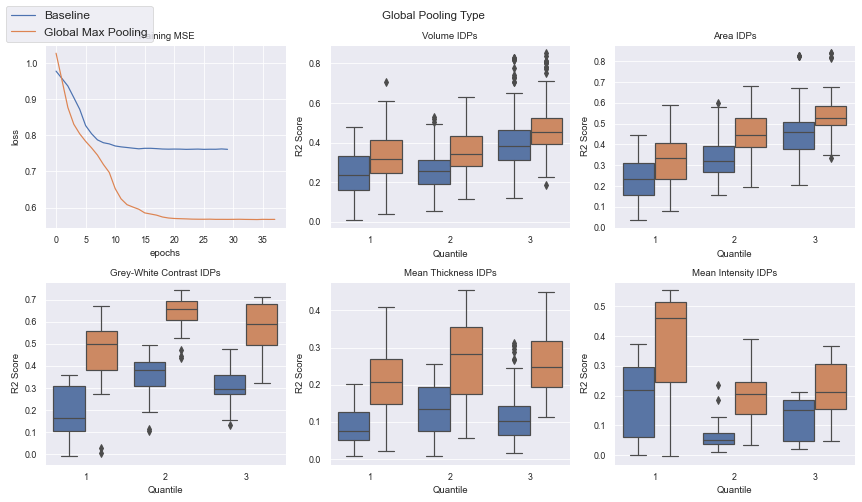

In [41]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Global Pooling Type')
fig.legend(lbls, loc='upper left', prop={'size':12})
plt.tight_layout()
fig.savefig('glopoltypes.png')
plt.show()

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Baseline | 0.76 | 0.26 | 1.7 M | 30 |										
| Global Max Pooling | 0.65 | 0.37 | 1.7 M | 38 | 

# Normalization

In [42]:
# layernorm_hist, layernorm_desc = process_results('Normalization/layernorm/sfcn_layer_norm', index=1)

groupnorm8_hist, groupnorm8_desc = process_results('Normalization/groupnorm8/sfcn_group_norm8', index=1)
groupnorm16_hist, groupnorm16_desc = process_results('Normalization/groupnorm16/sfcn_group_norm16', index=1)

groupnorm_ws8_hist, groupnorm_ws8_desc = process_results('Normalization/groupnorm_wstd8/sfcn_ws', index=1)
groupnorm_ws16_hist, groupnorm_ws16_desc = process_results('Normalization/groupnorm_wstd16/sfcn_ws16', index=1)

histlist = [pyr_hist, groupnorm8_hist, groupnorm16_hist, groupnorm_ws8_hist, groupnorm_ws16_hist]
desclist = [pyr_desc, groupnorm8_desc, groupnorm16_desc, groupnorm_ws8_desc, groupnorm_ws16_desc]
lbls = ['Baseline' , 'GN (8)','GN (16)','GN + WS (8)', 'GN + WS (16)']

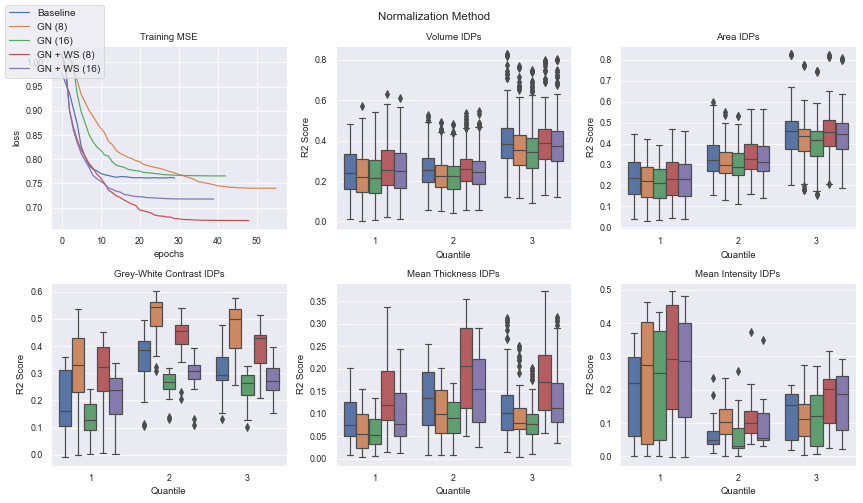

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Normalization Method')
fig.legend(lbls, loc='upper left', prop={'size':10})
plt.tight_layout()
fig.savefig('normalizationtypes.png')
plt.show()

| Model | Test Loss | Test R2 | N Params | N Epochs |
| --- | --- | --- | --- | --- |
| Baseline | 0.76 | 0.26 | 1.7 M | 30 |										
|  Group Norm (Size: 8) | 0.78 | 0.25 | 1.7 M | 56 |
|  Group Norm (Size: 16) | 0.80 | 0.23 | 1.7 M | 43 |	
|  Group Norm  + Weight Std (Size: 8) | 0.74 | 0.29 | 1.7 M | 49 |	
|  Group Norm  + Weight Std (Size: 16) | 0.80 | 0.23 | 1.7 M | 44 |

In [22]:
deepglomax_hist, deeperglomax_desc = process_results('SizeBeforeGlobalPooling/deeperk2/sfcn_deeper_k2_glomax')

histlist = [pyr_hist, deepglomax_hist]
desclist = [pyr_desc, deeperglomax_desc]
lbls = ['Baseline' , 'Deeper with Global Max']

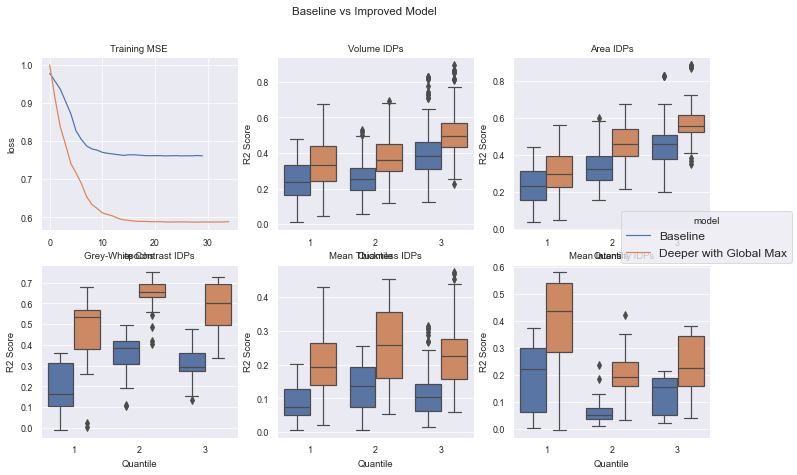

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches((12,7))

plot_time_series(histlist, lbls, group='loss', title=loss_title, ax=ax[0,0])
_= boxplot(desclist,  lbls, group='volume', title=volume_title, ax=ax[0,1])
_= boxplot(desclist,  lbls, group='area', title=area_title, ax=ax[0,2])
_= boxplot(desclist,  lbls, group='grey white', title=greywhite_title, ax=ax[1,0])
_= boxplot(desclist,  lbls, group='mean thickness', title=meanthick_title, ax=ax[1,1])
_= boxplot(desclist,  lbls, group='mean intensity', title=meaninten_title, ax=ax[1,2])

fig.suptitle('Baseline vs Improved Model')
fig.legend(lbls, title='model', loc='center right', prop={'size': 12})
fig.savefig('baselineimproved.png')
plt.show()